<a href="https://colab.research.google.com/github/jon4444/dry_beans_dataset_problem/blob/main/prepare_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Dataset

In [1]:
import pandas as pd
from numpy import asarray
from sklearn.datasets import make_classification
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from pandas import read_excel

data = pd.read_excel('sample_data/Dry_Bean_Dataset.xlsx')

In [2]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
data.info()
print(data.columns)
print(data.index)
print(data.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

## Data Cleaning Step

In [4]:
# Data cleaning step
# dropna drops missing values

print(data.isnull().sum())
data = data.dropna(axis=0)

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [5]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [6]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## Data Exploration

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'MajorAxisLength'}>,
        <Axes: title={'center': 'MinorAxisLength'}>],
       [<Axes: title={'center': 'AspectRation'}>,
        <Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'ConvexArea'}>,
        <Axes: title={'center': 'EquivDiameter'}>],
       [<Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Solidity'}>,
        <Axes: title={'center': 'roundness'}>,
        <Axes: title={'center': 'Compactness'}>],
       [<Axes: title={'center': 'ShapeFactor1'}>,
        <Axes: title={'center': 'ShapeFactor2'}>,
        <Axes: title={'center': 'ShapeFactor3'}>,
        <Axes: title={'center': 'ShapeFactor4'}>]], dtype=object)

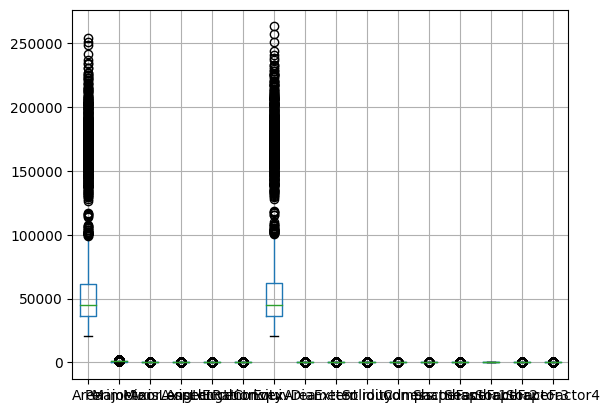

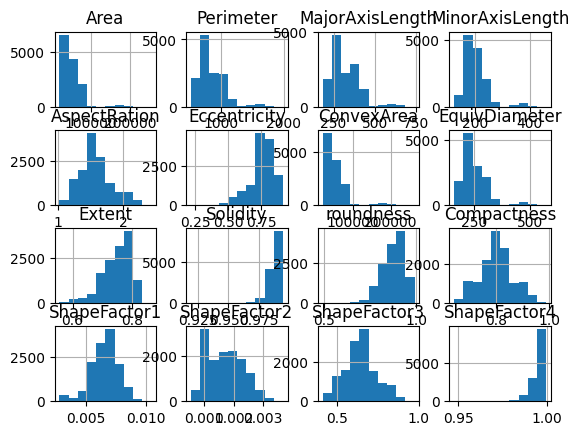

In [7]:
data.boxplot()
data.hist()

<ipython-input-8-53335c44a916>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())
<ipython-input-8-53335c44a916>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix=data.corr(method='pearson')


                     Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966722         0.931834         0.951602   
Perimeter        0.966722   1.000000         0.977338         0.913179   
MajorAxisLength  0.931834   0.977338         1.000000         0.826052   
MinorAxisLength  0.951602   0.913179         0.826052         1.000000   
AspectRation     0.241735   0.385276         0.550335        -0.009161   
Eccentricity     0.267481   0.391066         0.541972         0.019574   
ConvexArea       0.999939   0.967689         0.932607         0.951339   
EquivDiameter    0.984968   0.991380         0.961733         0.948539   
Extent           0.054345  -0.021160        -0.078062         0.145957   
Solidity        -0.196585  -0.303970        -0.284302        -0.155831   
roundness       -0.357530  -0.547647        -0.596358        -0.210344   
Compactness     -0.268067  -0.406857        -0.568377        -0.015066   
ShapeFactor1    -0.847958  -0.864623  

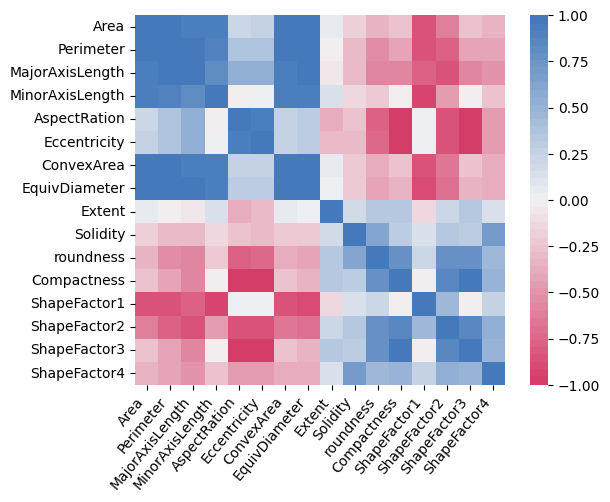

In [8]:
import seaborn as sns

print(data.corr())
correlationMatrix=data.corr(method='pearson')
ax = sns.heatmap(
    correlationMatrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=50),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=50,
    horizontalalignment='right'
);

## Feature Selection

In [9]:
# Create separate dataframe for independent variables

independent_variables = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 
                         'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 
                         'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']
X = data[independent_variables]

print(type(X))
print(X)

# Creating another for the target variable
target_variable = 'Class'
y = data[target_variable]

print(type(y))
print(y)

<class 'pandas.core.frame.DataFrame'>
        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Sol

In [10]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
import pickle

independent_variables = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 
                         'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 
                         'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']
X = data[independent_variables]

independent_variables_ordinal=['Class']
Class_categories=['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

X_ordinal = data[independent_variables_ordinal]
y = data[target_variable]

encOrdinalFeatures = preprocessing.OrdinalEncoder(categories=[Class_categories])
encOrdinalFeatures.fit(X_ordinal)
ordinalvalues=encOrdinalFeatures.transform(X_ordinal)
pickle.dump(encOrdinalFeatures,open("encOrdinalFeatures.p", "wb"))


encOrdinalFeatures.categories_

# Save encoding of categorical variables
pickle.dump(encOrdinalFeatures,open("encOrdinalFeatures.p","wb"))

In [11]:
# Additional step to encode the target variable
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
labelEncoder.fit(y)
labelEncoded_y = labelEncoder.transform(y)

print(labelEncoder.classes_)
print(labelEncoder.transform(labelEncoder.classes_))

y = labelEncoded_y

# save encoding of target variable
dict_labelEncoder = dict(zip(labelEncoder.transform(labelEncoder.classes_), labelEncoder.classes_))

print(dict_labelEncoder)
pickle.dump(dict_labelEncoder,open("dict_labelEncoder.p", "wb"))

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
[0 1 2 3 4 5 6]
{0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON', 4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'}


In [12]:
print(type(X))
print(X)
print(type(y))
print(y)

<class 'pandas.core.frame.DataFrame'>
        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Sol

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

def getNormalized(X):
  # fit the scaler on the training data
  normalized = MinMaxScaler().fit(X)

  # transform the training data
  X_norm = normalized.transform(X)
  X_train_norm = pd.DataFrame(X_norm, columns=X.columns.values)

  return X_train_norm;

In [14]:
# Normalize the X features
# we are rescaling the values into a range of [0, 1]

X_train_norm = getNormalized(X);
X_train_norm.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,0.139320,0.226304,0.245905,0.236190,0.397295,0.768181,0.136386,0.224978,0.625380,0.900112,0.765693,0.459403,0.493356,0.371445,0.413253,0.910285
std,0.125212,0.146710,0.154332,0.133171,0.175517,0.132860,0.122744,0.144996,0.157895,0.061783,0.118786,0.177989,0.147006,0.192168,0.175392,0.083898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067926,0.122404,0.125531,0.157944,0.289902,0.717685,0.066084,0.131880,0.525344,0.880592,0.683497,0.351551,0.406861,0.190064,0.302997,0.884146
50%,0.103469,0.184992,0.204017,0.207054,0.374443,0.787743,0.100974,0.189141,0.657953,0.915228,0.785402,0.463478,0.503986,0.364216,0.410514,0.935698
75%,0.174691,0.309781,0.347394,0.279902,0.485429,0.854208,0.171533,0.289620,0.744779,0.938164,0.852681,0.558634,0.585601,0.517962,0.506118,0.964454
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# convert to numpy array
X_numpy=np.array(X_train_norm)
y_numpy=np.array(y)

print(type(X_numpy))
print(type(y_numpy))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
# split the data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_numpy, y_numpy, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)


In [20]:
print(y_train)
print(X_train)
print(X_test)
print(y_test)

[5 2 3 ... 0 0 6]
[[0.07155972 0.12306985 0.10226295 ... 0.68125249 0.72440874 0.98045966]
 [0.20837674 0.34920315 0.42607996 ... 0.11896897 0.15741667 0.74766166]
 [0.04170865 0.10203994 0.0880039  ... 0.59302046 0.53313401 0.92350587]
 ...
 [0.10736306 0.19033379 0.20255869 ... 0.38422887 0.44553001 0.96636605]
 [0.25073016 0.39731445 0.3574386  ... 0.27565678 0.49594523 0.91543256]
 [0.09240124 0.16513788 0.16141718 ... 0.48304282 0.54391294 0.7574541 ]]
[[0.09359255 0.14821646 0.13795034 ... 0.59313957 0.68368457 0.993279  ]
 [0.20421783 0.38614602 0.33636012 ... 0.25127714 0.39532366 0.74289604]
 [0.07445046 0.125959   0.11675482 ... 0.6143021  0.65665293 0.97121827]
 ...
 [0.03412526 0.06728585 0.0787161  ... 0.59820659 0.51342449 0.96583475]
 [0.23170336 0.35755501 0.38782395 ... 0.19738775 0.33153631 0.86503513]
 [0.08159832 0.14882031 0.17062906 ... 0.40921678 0.42396831 0.94564195]]
[5 0 5 ... 3 2 6]


## Model Comparison

In [22]:
# train multiple classification models on the training set
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(), 
          RandomForestClassifier(n_estimators=100), SVC(), GaussianNB(), 
          MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)]

In [24]:
# evaluate the models on the training dataset
for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(type(model).__name__)
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print("======================================")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
Accuracy: 0.9173705471905986
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       261
           1       1.00      1.00      1.00       117
           2       0.92      0.94      0.93       317
           3       0.91      0.90      0.90       671
           4       0.97      0.95      0.96       408
           5       0.95      0.93      0.94       413
           6       0.83      0.89      0.86       536

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723

KNeighborsClassifier
Accuracy: 0.9188395152405435
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       261
           1       1.00      1.00      1.00       117
           2       0.91      0.96      0.93       317
           3       0.90      0.92      0.91       671
           4       0.98      0.94 

In [28]:
# Grid Search
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# HyperParameter Tuning
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
              'degree': [2, 3, 4], 'gamma': ['scale', 'auto']}

svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# fit svc model
svc.fit(X_train, y_train)

print("Making presictions for the following in the training set:")
predicted_values = svc.predict(X_train[0:10,:])
true_values = y_train[0:10]
print("True values are ", true_values)
print("The predicted values are", predicted_values)
print("Diff", abs(predicted_values - true_values))

print("Making predictions for the following in the test set:")
predicted_values = svc.predict(X_test[0:10,:])
true_values = y_test[0:10]
print("True values are ", true_values)
print("The predicted values are", predicted_values)
print("Diff", abs(predicted_values - true_values))


# Average Training error
svcTrain = y_train - svc.predict(X_train)
print("Average Training Error ", np.absolute(svcTrain).mean())

# Average Test Error
svcTest = y_test - svc.predict(X_test)
print("Average Test Error ", np.absolute(svcTest).mean())

# Accuracy Score for Test set
testing_accuracy = accuracy_score(true_values, predicted_values, normalize=False)
print("Accuracy Score in Test Set", testing_accuracy)

Making presictions for the following in the training set:
True values are  [5 2 3 2 6 5 5 5 4 0]
The predicted values are [5 4 3 2 6 5 5 5 4 0]
Diff [0 2 0 0 0 0 0 0 0 0]
Making predictions for the following in the test set:
True values are  [5 0 5 5 3 5 2 5 1 3]
The predicted values are [5 0 5 5 3 5 2 5 1 3]
Diff [0 0 0 0 0 0 0 0 0 0]
Average Training Error  0.19985304922850844
Average Test Error  0.2016158648549394
Accuracy Score in Test Set 10


In [45]:
# !pip install --upgrade scikit-learn

# # Confusion Matrix Plot
# import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.metrics import confusion_matrix

# # confusion matrix plot for training data with numbers included
# plot_confusion_matrix(svc, X_train, y_train, values_format="d")

# # confusion matrix plot for test data with numbers included
# plot_confusion_matrix(svc, X_test, y_test)

In [49]:
# Average Training Accuracy
training_accuracy = accuracy_score(y_train, svc.predict(X_train))
print("Average Training Accuracy ", training_accuracy)

# Average Testing Accuracy
testing_accuracy = accuracy_score(y_test, svc.predict(X_test))
print("Average Testing Accuracy ", testing_accuracy)

Average Training Accuracy  0.9211976487876561
Average Testing Accuracy  0.9258171134777818


In [52]:
# save the model to a file 
pickle.dump(svc, open("learning_model.p", "wb"))

## Model 2

In [60]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

def get_NN_model1(n_inputs, n_outputs):
  nn_model = Sequential()

  nn_model.add(tf.keras.layers.Dense(50, activation='relu'))
  nn_model.add(tf.keras.layers.Dense(100, activation='relu'))
  nn_model.add(tf.keras.layers.Dense(50, activation='relu'))
  nn_model.add(tf.keras.layers.Dense(1))

  nn_model.compile('adam', loss='mse', metrics=['mse'])
  return nn_model

# get the model 
def get_NN_model2(n_inputs, n_outputs):
  network = Sequential()
  network.add(Dense(n_inputs, input_shape=(n_inputs,), kernel_initializer='normal', activation='relu'))

  network.add(Dense(n_outputs, activation='relu'))

  network.compile('adam', loss='mse', metrics=['mse'])
  return network

In [61]:
print(X_train.shape[1])
n_inputs = X_train.shape[1]
n_outputs = 1

# get the model
nn_model = get_NN_model2(n_inputs, n_outputs)

16


## Train the model

In [62]:
# Explore train vs validation error for different epochs
nn_model.fit(X_train, y_train, verbose=1, epochs=20, batch_size=0, validation_data=(X_val, y_val))


Epoch 1/20
171/171 [==============================] - 2s 6ms/step - loss: 9.6564 - mse: 9.6564 - val_loss: 4.3200 - val_mse: 4.3200
Epoch 2/20
171/171 [==============================] - 1s 7ms/step - loss: 3.5616 - mse: 3.5616 - val_loss: 3.3453 - val_mse: 3.3453
Epoch 3/20
171/171 [==============================] - 1s 4ms/step - loss: 3.0942 - mse: 3.0942 - val_loss: 3.0386 - val_mse: 3.0386
Epoch 4/20
171/171 [==============================] - 1s 4ms/step - loss: 2.8331 - mse: 2.8331 - val_loss: 2.8256 - val_mse: 2.8256
Epoch 5/20
171/171 [==============================] - 1s 4ms/step - loss: 2.6664 - mse: 2.6664 - val_loss: 2.7071 - val_mse: 2.7071
Epoch 6/20
171/171 [==============================] - 1s 4ms/step - loss: 2.5747 - mse: 2.5747 - val_loss: 2.6307 - val_mse: 2.6307
Epoch 7/20
171/171 [==============================] - 1s 4ms/step - loss: 2.5244 - mse: 2.5244 - val_loss: 2.5890 - val_mse: 2.5890
Epoch 8/20
171/171 [==============================] - 1s 4ms/step - loss: 2.

In [64]:
print("The predictions using NN are")
print(nn_model.predict(X_train))

The predictions using NN are
171/171 [==============================] - 0s 1ms/step
[[4.017578 ]
 [2.7750516]
 [4.028748 ]
 ...
 [3.6671898]
 [1.9938672]
 [3.567826 ]]


In [66]:
y_pred_NN = nn_model.predict(X_train)
print(y_pred_NN)

171/171 [==============================] - 0s 1ms/step
[[4.017578 ]
 [2.7750516]
 [4.028748 ]
 ...
 [3.6671898]
 [1.9938672]
 [3.567826 ]]


In [75]:
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from datetime import datetime

predicted_train = nn_model.predict(X_train)
predicted_val = nn_model.predict(X_val)
predicted_test = nn_model.predict(X_test)

y_train = y_train.flatten()
y_val = y_val.flatten()
y_test = y_test.flatten()

predicted_train = predicted_train.flatten()
predicted_val = predicted_val.flatten()
predicted_test = predicted_test.flatten()

print(predicted_train.flatten())
print(predicted_val.flatten())
print(predicted_test.flatten())

timeStr = datetime.now().strftime("%Y%m%d-%H%M%S")

# write to file
df = pd.DataFrame({'y_train':y_train, 'predicted_train':predicted_train})
df.to_csv("train_error"+timeStr+".csv")

df = pd.DataFrame({'y_val':y_val, 'predicted_val':predicted_val})
df.to_csv("val_error"+timeStr+".csv")

df = pd.DataFrame({'y_test':y_test, 'predicted_test':predicted_test})
df.to_csv("test_error"+timeStr+".csv")

86/86 [==============================] - 0s 1ms/step
[4.017578  2.7750516 4.028748  ... 3.6671898 1.9938672 3.567826 ]
[4.413442  4.4068627 3.737483  ... 4.4133215 4.0711055 2.4109006]
[3.9280312 1.9299835 4.0504494 ... 4.5337563 2.4867465 4.0176153]


In [76]:
# Average Training Error
dataTrain_NN= y_train = predicted_train.flatten()
print("Average Train Error ", np.absolute(dataTrain_NN).mean())

# Average val Error
dataVal_NN = y_val - predicted_val.flatten()
print("Average val Error ", np.absolute(dataVal_NN).mean())

# Average Test Error
dataTest_NN = y_test - predicted_test.flatten()
print("Average test error ", np.absolute(dataTest_NN).mean())

Average Train Error  3.4873657
Average val Error  1.345107255362571
Average test error  1.3302989898798792
